# PROYECTO INTEGRADOR - WOM - UNICORN ACADEMY

## DESARROLLO

**Importación de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1. Conexión de bases de datos

Validamos donde se encuentra la carpeta para saber si suben los archivos.

In [ ]:
import os
os.getcwd()

'/content'

Conectamos con drive ya que los archivos están en drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creación de dataframes por cada archivo .csv traído de SQL

In [ ]:
ruta = '/content/drive/MyDrive/Project_team_Telecom/csv_limpios/MODELO DE DATOS RELACIONAL - dim_canales_venta.csv'
df0 = pd.read_csv(ruta, sep = ";")
df0.head()

,id_canal,nombre_almacen,canal_nombre,region_nombre
0,32012,Tienda Centro Armenia,Tiendas,Regional Eje Cafetero
1,32019,Tienda Bolivar Plaza,Tiendas,Regional Eje Cafetero
2,32026,Tienda Exito Cuba,Tiendas,Regional Eje Cafetero
3,32033,Tienda Dosquebradas,Tiendas,Regional Eje Cafetero
4,32040,Tienda Florencia Centro,Tiendas,Regional Eje Cafetero


In [ ]:
ruta = '/content/drive/MyDrive/Project_team_Telecom/csv_limpios/MODELO DE DATOS RELACIONAL - dim_consultores.csv'
df1 = pd.read_csv(ruta, sep = ";", encoding= "latin1")
df1.head()

,id_consultor,nombre_consultor,id_canal
0,1033,Cristian Camilo Manrique Diaz,32110
1,1039,Omar Leandro Caliman Romero,32138
2,1041,Luz Dary Casilimas Caballero,32075
3,1045,Luz Enith Ochoa Lopez,32040
4,1046,John Fredy Galvis Rojas,32145


In [ ]:
ruta = '/content/drive/MyDrive/Project_team_Telecom/csv_limpios/MODELO DE DATOS RELACIONAL - dim_operadores.csv'
df2 = pd.read_csv(ruta, sep = ";", encoding= "latin1")
df2.head()

,id_operador,operador
0,20301,ADDS NUEVA
1,20361,AVANTEL
2,20313,COMCEL
3,20331,ETB
4,20337,EXITO


In [ ]:
ruta = '/content/drive/MyDrive/Project_team_Telecom/csv_limpios/MODELO DE DATOS RELACIONAL - dim_planes.csv'
df3 = pd.read_csv(ruta, sep = ";", encoding= "latin1")
df3.head()

,id_plan,nombre_plan,servicio,tipo_servicio
0,2,PLAN M,Postpaid,Mobile
1,3,PLAN L,Postpaid,Mobile
2,4,PLAN L,Postpaid,B2B
3,5,PLAN XL,Postpaid,B2B
4,6,PLAN S,Postpaid,Mobile


In [ ]:
ruta = '/content/drive/MyDrive/Project_team_Telecom/csv_limpios/MODELO DE DATOS RELACIONAL - fact_transacciones.csv'
df4 = pd.read_csv(ruta, sep = ";", encoding= "latin1")
df4.head()

,id_transaccion,dia,mes,anio,estado,fecha_alta,fecha_factura,revenue,plan_revenue,cantidad,id_plan,id_consultor,id_operador,id_canal
0,1000244438,16,4,2025,Active,2025-04-16,2025-04-16,44990,44990,1,3,1649,20301,32138
1,1000298808,14,6,2025,Active,2025-06-14,2025-06-12,59990,59990,1,3,1419,20319,32061
2,1000312857,13,5,2025,Active,2025-05-13,2025-05-12,49990,49990,1,3,1327,20313,32054
3,1000472097,4,5,2025,Active,2025-05-04,2025-05-04,63980,31990,2,3,1873,20301,32131
4,1000568185,2,4,2025,Active,2025-04-02,2022-04-02,31990,31990,1,3,1712,20301,32110


### 2. Analisis Descriptivo

#### Información general de las tablas

Tabla Canales de venta

In [ ]:
df0.info()
df0.shape
df0.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_canal        31 non-null     int64 
 1   nombre_almacen  31 non-null     object
 2   canal_nombre    31 non-null     object
 3   region_nombre   31 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


,0
id_canal,0
nombre_almacen,0
canal_nombre,0
region_nombre,0


Tabla consultores

In [ ]:
df1.info()
df1.shape
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_consultor      104 non-null    int64 
 1   nombre_consultor  104 non-null    object
 2   id_canal          104 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


,0
id_consultor,0
nombre_consultor,0
id_canal,0


Tabla operadores

In [ ]:
df2.info()
df2.shape
df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_operador  12 non-null     int64 
 1   operador     12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


,0
id_operador,0
operador,0


Tabla planes

In [ ]:
df3.info()
df3.shape
df3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_plan        9 non-null      int64 
 1   nombre_plan    9 non-null      object
 2   servicio       9 non-null      object
 3   tipo_servicio  9 non-null      object
dtypes: int64(1), object(3)
memory usage: 420.0+ bytes


,0
id_plan,0
nombre_plan,0
servicio,0
tipo_servicio,0


Tabla Transacciones

In [ ]:
df4.info()
df4.shape
df4.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019 entries, 0 to 7018
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_transaccion  7019 non-null   int64 
 1   dia             7019 non-null   int64 
 2   mes             7019 non-null   int64 
 3   anio            7019 non-null   int64 
 4   estado          7019 non-null   object
 5   fecha_alta      7019 non-null   object
 6   fecha_factura   7019 non-null   object
 7   revenue         7019 non-null   int64 
 8   plan_revenue    7019 non-null   int64 
 9   cantidad        7019 non-null   int64 
 10  id_plan         7019 non-null   int64 
 11  id_consultor    7019 non-null   int64 
 12  id_operador     7019 non-null   int64 
 13  id_canal        7019 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 767.8+ KB


,0
id_transaccion,0
dia,0
mes,0
anio,0
estado,0
fecha_alta,0
fecha_factura,0
revenue,0
plan_revenue,0
cantidad,0


Modificación en la tabla transacciones el nombre de las columnas

In [ ]:
df4.rename(columns = {'anio' : 'año'}, inplace = True)
df4.sort_values(by = ['año', 'mes', 'dia'])
df4

,id_transaccion,dia,mes,año,estado,fecha_alta,fecha_factura,revenue,plan_revenue,cantidad,id_plan,id_consultor,id_operador,id_canal
0,1000244438,16,4,2025,Active,2025-04-16,2025-04-16,44990,44990,1,3,1649,20301,32138
1,1000298808,14,6,2025,Active,2025-06-14,2025-06-12,59990,59990,1,3,1419,20319,32061
2,1000312857,13,5,2025,Active,2025-05-13,2025-05-12,49990,49990,1,3,1327,20313,32054
3,1000472097,4,5,2025,Active,2025-05-04,2025-05-04,63980,31990,2,3,1873,20301,32131
4,1000568185,2,4,2025,Active,2025-04-02,2022-04-02,31990,31990,1,3,1712,20301,32110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,1999390118,19,5,2025,Active,2025-05-19,2025-05-19,49990,49990,1,3,1107,20301,32068
7015,1999630175,20,5,2025,Active,2025-05-20,2025-05-19,49990,49990,1,3,1457,20319,32061
7016,1999682423,6,6,2025,Active,2025-06-06,2025-06-04,49990,49990,1,3,1873,20313,32047
7017,1999688807,22,4,2025,Active,2025-04-22,2025-04-11,49990,49990,1,6,1327,20313,32054


Convertimos las fechas a Datetime

In [ ]:
df4["fecha_alta"] = pd.to_datetime(df4["fecha_alta"], errors="coerce")
df4["fecha_factura"] = pd.to_datetime(df4["fecha_factura"], errors = "coerce")
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019 entries, 0 to 7018
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_transaccion  7019 non-null   int64         
 1   dia             7019 non-null   int64         
 2   mes             7019 non-null   int64         
 3   año             7019 non-null   int64         
 4   estado          7019 non-null   object        
 5   fecha_alta      7019 non-null   datetime64[ns]
 6   fecha_factura   7019 non-null   datetime64[ns]
 7   revenue         7019 non-null   int64         
 8   plan_revenue    7019 non-null   int64         
 9   cantidad        7019 non-null   int64         
 10  id_plan         7019 non-null   int64         
 11  id_consultor    7019 non-null   int64         
 12  id_operador     7019 non-null   int64         
 13  id_canal        7019 non-null   int64         
dtypes: datetime64[ns](2), int64(11), object(1)
memory usage:

### Resumen estadístico

Para la realización del resumen estadístico, se definieron las variables cuantitativas a desarrollar las cuales son: revenue, plan revenue y cantidad. Así mismo la variable cualitativa: estado.

Variables numéricas

In [ ]:
df4[["revenue","plan_revenue", "cantidad"]].describe().round(2)

,revenue,plan_revenue,cantidad
count,7019.00,7019.00,7019.00
mean,61322.59,53760.06,1.14
std,27395.33,10731.46,0.42
min,29990.00,29990.00,1.00
25%,49990.00,49990.00,1.00
50%,49990.00,49990.00,1.00
75%,75990.00,49990.00,1.00
max,395940.00,75990.00,7.00


Variables  categóricas

La variable cuantitativa encontrada es estado, la cuál se modifica a categórica.

In [ ]:
df4['estado'] = df4['estado'].astype('category')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019 entries, 0 to 7018
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_transaccion  7019 non-null   int64         
 1   dia             7019 non-null   int64         
 2   mes             7019 non-null   int64         
 3   año             7019 non-null   int64         
 4   estado          7019 non-null   category      
 5   fecha_alta      7019 non-null   datetime64[ns]
 6   fecha_factura   7019 non-null   datetime64[ns]
 7   revenue         7019 non-null   int64         
 8   plan_revenue    7019 non-null   int64         
 9   cantidad        7019 non-null   int64         
 10  id_plan         7019 non-null   int64         
 11  id_consultor    7019 non-null   int64         
 12  id_operador     7019 non-null   int64         
 13  id_canal        7019 non-null   int64         
dtypes: category(1), datetime64[ns](2), int64(11)
memory usag

In [ ]:
df4.describe(include=['object', 'category'])

,estado
count,7019
unique,4
top,Active
freq,6709


In [ ]:
df4['estado'].value_counts()

,count
estado,
Active,6709
Termination,275
One-Way Block,30
Two-Way Block,5


### Distribución de variables

Distribución de variables cualitativas

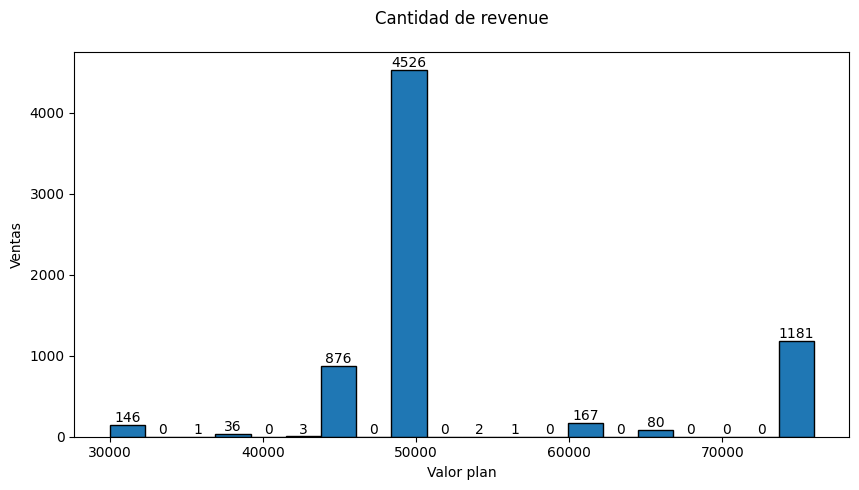

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
n, bins, patches = ax.hist(df4['plan_revenue'], bins=20, edgecolor='black')

for altura, izquierda, derecha in zip(n, bins[:-1], bins[1:]):
    x = (izquierda + derecha) / 2  # Centro de la barra
    y = altura                     # Altura de la barra
    ax.text(x, y + 0.2, str(int(altura)), ha='center', va='bottom')
ax.set_xlabel('Valor plan')
ax.set_ylabel('Ventas')
ax.set_title('Cantidad de revenue', pad=20)
plt.show();

Encontramos que en valor del revenue, hay valores atípicos a los conocidos

In [ ]:
df4['plan_revenue'].value_counts()

,count
plan_revenue,
49990,4524
75990,1181
44990,606
45990,270
59990,167
31990,145
65990,80
37990,35
42990,3


Distribución de variable cuantitativa

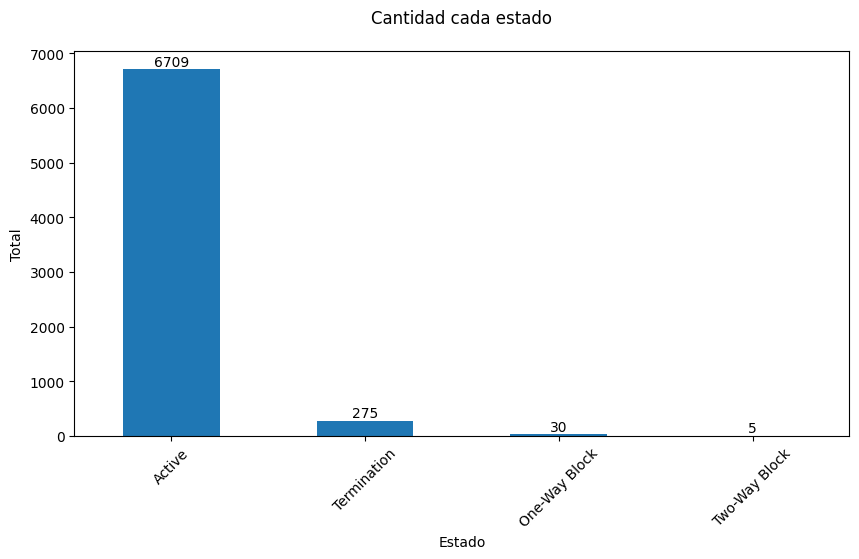

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
counts = df4['estado'].value_counts()
counts.plot(kind='bar', ax=ax)

for i, count in enumerate(counts): #Cantidad encima de la barra
    ax.text(i, count + 5, str(count), ha='center', va='bottom')

ax.set_xlabel('Estado')
ax.set_ylabel('Total')
ax.set_title('Cantidad cada estado', pad=20)
plt.xticks(rotation=45) # Rotación de etiquetas
plt.show();

Detección de valores atípicos (Pendiente)

<Axes: xlabel='plan_revenue'>

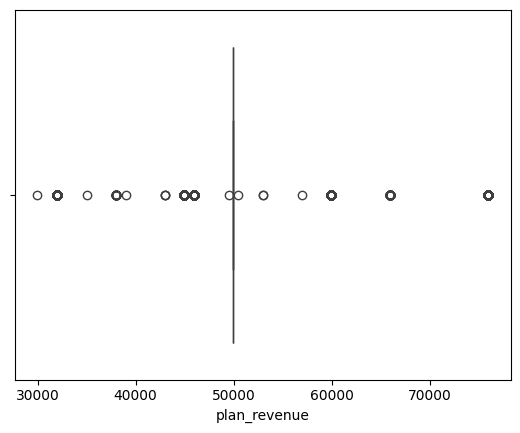

In [ ]:
sns.boxplot(x=df4['plan_revenue'])

Analisis de fechas

Se valida si tenemos novedad en las fechas, ya que anteriormente se modificó.

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019 entries, 0 to 7018
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_transaccion  7019 non-null   int64         
 1   dia             7019 non-null   int64         
 2   mes             7019 non-null   int64         
 3   año             7019 non-null   int64         
 4   estado          7019 non-null   category      
 5   fecha_alta      7019 non-null   datetime64[ns]
 6   fecha_factura   7019 non-null   datetime64[ns]
 7   revenue         7019 non-null   int64         
 8   plan_revenue    7019 non-null   int64         
 9   cantidad        7019 non-null   int64         
 10  id_plan         7019 non-null   int64         
 11  id_consultor    7019 non-null   int64         
 12  id_operador     7019 non-null   int64         
 13  id_canal        7019 non-null   int64         
dtypes: category(1), datetime64[ns](2), int64(11)
memory usag

Fecha_alta y fecha_factura se encuentran en formato datetime

Chequeo de integridad

In [ ]:
set(df0['id_canal']) - set(df4['id_canal'])

set()

In [ ]:
set(df1['id_consultor']) - set(df4['id_consultor'])

set()

In [ ]:
set(df2['id_operador']) - set(df4['id_operador'])

{20349, 20355, 20361, 20367}

In [ ]:
set(df3['id_plan']) - set(df4['id_plan'])

{4, 7, 8, 9, 10}

Encontramos valores huérfanos así que validaremos en SQL (VER LUEGO DE LA SECCIÓN DE CONEXION A SQL)

### PREGUNTAS STAKEHOLDER

Rentabilidad y Estrategia de Producto



1.   Rendimiento por planes:
*   Requerimos saber el volumen de venta e ingresos generados de los planes según su tipo de servicio.
*   ¿Cómo se distribuyen los ingresos y la cantidad de transacciones entre los diferentes tipos de servicio como Mobile y B2B?
*   ¿Cuál es el valor promedio de cada transacción para Mobile y B2B?
*   ¿Cuál es el valor MAX y MIN del servicio B2B y Mobile?
*   ¿Qué planes específicos son los más rentables dentro de cada tipo de servicio?
*   ¿Cuál es la relación entre ingresos totales y ventas totales por plan?
*   Teniendo en cuenta el nombre del plan, ¿Qué consultores están llevando las ventas del servicio B2B?
*   ¿Qué canal es más efectivo para vender planes B2B que para Mobile?
*   ¿Cuál es la rentabilidad de los servicios por canal?
*   ¿Cuál es el estado de cada plan?


2.   Rendimiento cruzado de canales y asesores
*   Requerimos el volumen de venta e ingresos totales por los diferentes canales de venta.
*   ¿Qué almacenes son los más rentables por asesor?
*   ¿Cuántos consultores trabajan para los diversos canales de venta?
*   ¿Por mes cuántos asesores tiene cada estado?
*   E¿Qué tiendas son las más rentables para la venta de los servicios B2B y mobile?
*   ¿Cuál es la relación entre el volumen de venta e ingresos generados por almacén?

  3.   Rendimiento del Equipo de Ventas (Consultores)

*   ¿Cuál es el ingreso promedio y el volumen de venta por asesor?
*   ¿Qué planes de datos vende cada asesor?
*   ¿Cuántos consultores hay por estado y quienes son?
*   ¿Cuántas ventas mensuales llevan a cabo los asesores solamente en estado Active? (Meta 2 diarias)
*   ¿Cuántas ventas trimestrales llevan a cabo los asesores solamente en estado Active? (Meta 180 trimestral)
*   Realizar una evaluación del rendimiento vs. la meta según el estado Active.
*   ¿Cuál es la tasa de abandono para el estado Termination?
*   Evaluación del rendimiento vs. la meta en estado Termination.
*   Evaluación del rendimiento vs. la meta en estado One-Way Block
*   Evaluación del rendimiento vs. la meta en estado Two-Way Block


4.   Evaluación de los operadores antiguos.

*   ¿Qué planes están asociados a los antiguos operadores?
*   ¿Existe alguna correlación entre el operador del cliente y el tipo de plan que contratan (B2B o Mobile)?









### Conexión con SQL

In [ ]:
pip install prettytable==3.9.0

In [ ]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///Telecom.db") ## Conexión a Sqlite

In [ ]:
df0.to_sql("canales_venta", con=engine, if_exists="replace", index=False)
df1.to_sql("consultores", con=engine, if_exists="replace", index=False)
df2.to_sql("operadores", con=engine, if_exists="replace", index=False)
df3.to_sql("planes", con=engine, if_exists="replace", index=False)
df4.to_sql("transacciones", con=engine, if_exists="replace", index=False)

7019

In [ ]:
%load_ext sql
%sql sqlite:///Telecom.db

In [ ]:
%sql

 * sqlite:///Telecom.db


In [ ]:
os.listdir() #Comprobación si existe el engine

['.config', 'drive', 'Telecom.db', 'sample_data']

Validamos los operadores que anteriormente se informó que no habían transacciones realizadas como valores huérfanos 20349, 20355, 20361, 20367.

In [ ]:
%%sql
SELECT o.id_operador,
		o.operador AS operador,
		sum(t.cantidad) AS cantidad
FROM operadores o
LEFT JOIN transacciones t ON o.id_operador = t.id_operador
WHERE cantidad IS NULL
GROUP BY operador
ORDER BY cantidad;

 * sqlite:///Telecom.db
Done.


id_operador,operador,cantidad
20361,AVANTEL,None
20367,FLASH,None
20349,LIWA S.A.S,None
20355,PLINTRON COLOMBIA S.A.S,None


Validamos los planes que anteriormente se informó que no habían transacciones realizadas como valores huérfanos 4, 7, 8, 9, 10

In [ ]:
%%sql
SELECT p.id_plan,
		p.nombre_plan AS plan,
		p.tipo_servicio AS servicio,
		sum(t.cantidad) AS cantidad
FROM planes p
LEFT JOIN transacciones t ON p.id_plan = t.id_plan
WHERE cantidad IS NULL
GROUP BY plan
ORDER BY cantidad;

 * sqlite:///Telecom.db
Done.


id_plan,plan,servicio,cantidad
4,PLAN L,B2B,None
8,PLAN M,B2B,None
9,PLAN S,B2B,None
7,PLAN XL,Mobile,None
10,PLAN XS,Mobile,None


## Desarrollo preguntas de negocio

### Rentabilidad y Estrategia de Producto
 Rendimiento por planes:


Requerimos saber el volumen de venta e ingresos generados de los planes según su tipo de servicio.

In [ ]:
%%sql
SELECT p.id_plan,
       p.nombre_plan,
       p.tipo_servicio,
       SUM(t.cantidad) as cantidad_total,
       -- FORMAT(SUM(t.revenue),2) as ingresos_totales        [FORMAT in MySQL]
       printf('%,d', SUM(t.revenue)) as ingresos_totales --  [FORMAT in SQLite]
FROM planes p
LEFT JOIN transacciones t ON p.id_plan = t.id_plan
GROUP BY p.id_plan, p.nombre_plan, p.tipo_servicio
ORDER BY cantidad_total, ingresos_totales ASC;

 * sqlite:///Telecom.db
Done.


id_plan,nombre_plan,tipo_servicio,cantidad_total,ingresos_totales
4,PLAN L,B2B,None,0
7,PLAN XL,Mobile,None,0
8,PLAN M,B2B,None,0
9,PLAN S,B2B,None,0
10,PLAN XS,Mobile,None,0
2,PLAN M,Mobile,167,"11,679,330"
5,PLAN XL,B2B,304,"15,865,960"
6,PLAN S,Mobile,847,"48,836,050"
3,PLAN L,Mobile,6661,"354,041,900"


¿Cómo se distribuyen los ingresos y la cantidad de transacciones entre los diferentes tipos de servicio como Mobile y B2B?


In [ ]:
%%sql
SELECT
    p.tipo_servicio,
    -- FORMAT(SUM(t.revenue),2) AS ingresos_totales,     [FORMAT in MySQL]
    printf('%,d',SUM(t.revenue)) AS ingresos_totales,  --[FORMAT in SQLite]
    COUNT(t.id_transaccion) AS cantidad_transacciones,
    SUM(t.cantidad) AS total_planes_vendidos
FROM planes p
LEFT JOIN transacciones t ON p.id_plan = t.id_plan
GROUP BY p.tipo_servicio
ORDER BY ingresos_totales DESC;

 * sqlite:///Telecom.db
Done.


tipo_servicio,ingresos_totales,cantidad_transacciones,total_planes_vendidos
Mobile,"414,557,280",6715,7675
B2B,"15,865,960",304,304


Cual es el valor promedio de cada transaccion para Mobile y B2B?

In [ ]:
%%sql
SELECT
      -- FORMAT(AVG(t.revenue),2) as valor_promedio,      [FORMAT in MySql]
      printf('%,d',AVG(t.revenue)) as valor_promedio,  -- [FORMAT in SQLite]
       P.tipo_servicio
FROM planes p
LEFT JOIN transacciones t ON p.id_plan = t.id_plan
GROUP BY tipo_servicio
ORDER BY valor_promedio;

 * sqlite:///Telecom.db
Done.


valor_promedio,tipo_servicio
"52,190",B2B
"61,736",Mobile


Cual es el valor MAX y MIN del servicio B2B y Mobile?

Valor Maximo y Minimo B2B

In [ ]:
%%sql
SELECT p.tipo_servicio,
       MAX(t.plan_revenue) as valor_maximo,
       MIN(t.plan_revenue) as valor_mínimo
FROM transacciones t
JOIN planes p ON t.id_plan = p.id_plan
WHERE p.tipo_servicio = 'B2B';

 * sqlite:///Telecom.db
Done.


tipo_servicio,valor_maximo,valor_mínimo
B2B,75990,31990


Valor Maximo y Minimo Mobile

In [ ]:
%%sql
SELECT p.tipo_servicio,
	   MAX(t.plan_revenue) as valor_maximo,
     MIN(t.plan_revenue) as valor_minimo,
       p.nombre_plan
from transacciones t
LEFT JOIN planes p ON t.id_plan = p.id_plan
where p.tipo_servicio = 'Mobile'
group by p.tipo_servicio, p.nombre_plan
order by valor_maximo;

 * sqlite:///Telecom.db
Done.


tipo_servicio,valor_maximo,valor_minimo,nombre_plan
Mobile,75990,29990,PLAN L
Mobile,75990,37990,PLAN M
Mobile,75990,31990,PLAN S


¿Qué planes específicos son los más rentables dentro de cada tipo de servicio?

In [ ]:
%%sql
SELECT
    p.tipo_servicio,
    p.nombre_plan,
    -- FORMAT(SUM(t.revenue),2) AS ingresos_totales,     [FORMAT in MySQL]
    printf('%,d',SUM(t.revenue)) AS ingresos_totales, -- [FORMAT in SQLite]
    COUNT(t.id_transaccion) AS cantidad_transacciones,
    SUM(t.cantidad) AS ventas_totales
FROM planes AS p
JOIN transacciones AS t ON p.id_plan = t.id_plan
GROUP BY p.tipo_servicio, p.nombre_plan
ORDER BY p.tipo_servicio, ingresos_totales DESC;

 * sqlite:///Telecom.db
Done.


tipo_servicio,nombre_plan,ingresos_totales,cantidad_transacciones,ventas_totales
B2B,PLAN XL,"15,865,960",304,304
Mobile,PLAN S,"48,836,050",799,847
Mobile,PLAN L,"354,041,900",5749,6661
Mobile,PLAN M,"11,679,330",167,167


En base a la pregunta anterior, cual es la relacion entre ingresos totales y ventas totales por plan?

In [ ]:
%%sql
SELECT
    p.tipo_servicio,
    p.nombre_plan,
    -- FORMAT(((SUM(t.revenue)) / (SUM(t.cantidad))),2) AS relacion   [FORTMAT in Mysql]
    printf('%,d',(SUM(t.revenue)) / (SUM(t.cantidad))) AS relacion  --[FORMAT in SQLite]
FROM planes AS p
JOIN transacciones AS t ON p.id_plan = t.id_plan
GROUP BY p.tipo_servicio, p.nombre_plan
ORDER BY relacion DESC;

 * sqlite:///Telecom.db
Done.


tipo_servicio,nombre_plan,relacion
Mobile,PLAN M,"69,936"
Mobile,PLAN S,"57,657"
Mobile,PLAN L,"53,151"
B2B,PLAN XL,"52,190"


Teniendo en cuenta el nombre del plan, ¿Qué consultores están llevando las ventas del servicio B2B?

In [ ]:
%%sql
SELECT
    dc.nombre_consultor,
    dp.tipo_servicio,
    dp.nombre_plan,
    dcv.canal_nombre,
    -- FORMAT(SUM(ft.revenue),2) AS ingresos_totales,    [FORMAT in MySQL]
    printf('%,d',SUM(ft.revenue)) AS ingresos_totales, --[FORMAT in SQLite]
    COUNT(ft.id_transaccion) AS ventas_totales,
    SUM(ft.cantidad) AS cantidad_vendida
FROM transacciones AS ft
JOIN planes AS dp ON ft.id_plan = dp.id_plan
JOIN consultores AS dc ON ft.id_consultor = dc.id_consultor
JOIN canales_venta AS dcv ON dc.id_canal = dcv.id_canal
WHERE dp.tipo_servicio = 'B2B'
GROUP BY dc.nombre_consultor, dcv.canal_nombre, dp.tipo_servicio, dp.nombre_plan
ORDER BY ingresos_totales DESC;

 * sqlite:///Telecom.db
Done.


nombre_consultor,tipo_servicio,nombre_plan,canal_nombre,ingresos_totales,ventas_totales,cantidad_vendida
Dany Alexander Londoño Robledo,B2B,PLAN XL,Tiendas,"99,980",2,2
Johan Alejandro Lopez Galvis,B2B,PLAN XL,Tiendas,"99,980",2,2
Sara Carolina Paez,B2B,PLAN XL,Tiendas,"99,980",2,2
Valentina Robles Vargas,B2B,PLAN XL,Tiendas,"99,980",2,2
Yenifer Yuliana Caceres Salguero,B2B,PLAN XL,Tiendas,"99,980",2,2
Derly Lorena Rojas Arias,B2B,PLAN XL,Tiendas,"965,820",18,18
Juanita Lievano Velandia,B2B,PLAN XL,Tiendas,"943,830",17,17
Mario Felipe Toledo Sanchez,B2B,PLAN XL,Tiendas,"844,840",16,16
Vanessa Alexandra Prieto Alvarez,B2B,PLAN XL,Tiendas,"752,860",14,14
Diana Caterine Maldonado Sierra,B2B,PLAN XL,Tiendas,"75,990",1,1


¿Qué canales son más efectivos para vender planes B2B que para Mobile?

In [ ]:
%%sql
SELECT
    dcv.canal_nombre,
    dp.tipo_servicio,
    -- FORMAT(SUM(ft.revenue),2) AS ingresos_totales,    [FORMAT in MySQL]
    printf('%,d',SUM(ft.revenue)) AS ingresos_totales, --[FORMAT in SQLite]
    COUNT(ft.id_transaccion) AS cantidad_transacciones
FROM transacciones AS ft
JOIN planes AS dp ON ft.id_plan = dp.id_plan
JOIN canales_venta AS dcv ON ft.id_canal = dcv.id_canal
WHERE dp.tipo_servicio IN ('B2B', 'Mobile')
GROUP BY dcv.canal_nombre, dp.tipo_servicio
ORDER BY dcv.canal_nombre, ingresos_totales DESC;

 * sqlite:///Telecom.db
Done.


canal_nombre,tipo_servicio,ingresos_totales,cantidad_transacciones
Tiendas Express,Mobile,"40,047,260",643
Kioscos,Mobile,"37,667,930",604
Tiendas,Mobile,"336,842,090",5468
Tiendas,B2B,"15,865,960",304


En base a la pregunta anterior, cual es la rentabilidad de los servicios por canal?

In [ ]:
%%sql
SELECT
    dcv.canal_nombre,
    dp.tipo_servicio,
    --FORMAT((SUM(ft.revenue) / (SUM(ft.cantidad))),2) AS relacion     [FORMAT in MySQL]
    printf('%,d',(SUM(ft.revenue) / (SUM(ft.cantidad)))) AS relacion --[FORMAT in SQLite]
FROM transacciones AS ft
JOIN planes AS dp ON ft.id_plan = dp.id_plan
JOIN canales_venta AS dcv ON ft.id_canal = dcv.id_canal
WHERE dp.tipo_servicio IN ('B2B', 'Mobile')
GROUP BY dcv.canal_nombre, dp.tipo_servicio
ORDER BY dcv.canal_nombre, relacion DESC;


 * sqlite:///Telecom.db
Done.


canal_nombre,tipo_servicio,relacion
Kioscos,Mobile,"57,246"
Tiendas,Mobile,"53,955"
Tiendas,B2B,"52,190"
Tiendas Express,Mobile,"51,740"


Cual es el estado de cada plan?

In [ ]:
%%sql
SELECT COUNT(t.estado) as cantidad,
       t.estado,
       p.nombre_plan
FROM planes p
LEFT JOIN transacciones t ON p.id_plan = t.id_plan
GROUP BY p.nombre_plan, t.estado
ORDER BY cantidad DESC;

 * sqlite:///Telecom.db
Done.


cantidad,estado,nombre_plan
5477,Active,PLAN L
769,Active,PLAN S
303,Active,PLAN XL
244,Termination,PLAN L
160,Active,PLAN M
26,Termination,PLAN S
23,One-Way Block,PLAN L
5,Two-Way Block,PLAN L
5,Termination,PLAN M
4,One-Way Block,PLAN S


2. Eficiancia de los canales de venta

Rendimiento cruzado de canales y consultores

Requerimos el volumen de venta e ingresos totales por los diferentes canales de venta

In [ ]:
%%sql
SELECT
    dcv.canal_nombre,
    COUNT(ft.id_transaccion) AS volumen_venta,
    -- FORMAT(SUM(ft.revenue),2) AS ingresos_totales    [FORMAT in Mysql]
    printf('%,d',SUM(ft.revenue)) AS ingresos_totales --[FORMAT in SQLite]
FROM transacciones AS ft
JOIN canales_venta AS dcv ON ft.id_canal = dcv.id_canal
GROUP BY dcv.canal_nombre
ORDER BY dcv.canal_nombre, volumen_venta DESC;

 * sqlite:///Telecom.db
Done.


canal_nombre,volumen_venta,ingresos_totales
Kioscos,604,"37,667,930"
Tiendas,5772,"352,708,050"
Tiendas Express,643,"40,047,260"


¿Qué asesor son los más rentables por tienda?

In [ ]:
%%sql
SELECT cv.nombre_almacen AS Almacen,
       c.nombre_consultor AS Consultor,
       SUM(t.revenue) AS ingresos_totales
FROM canales_venta cv
JOIN transacciones t ON cv.id_canal = t.id_canal
JOIN consultores c ON t.id_consultor = c.id_consultor
GROUP BY Almacen, Consultor
ORDER BY ingresos_totales DESC;

 * sqlite:///Telecom.db
Done.


Almacen,Consultor,ingresos_totales
Tienda Ibague Combeima,Vanessa Alexandra Prieto Alvarez,12253850
Tienda Ibague,Juanita Lievano Velandia,11745920
Tienda Bolivar Plaza,Alexandra Sanchez Martinez,10979890
Tienda Bolivar Plaza,Leidy Vanessa Amaya,9944130
Tienda Dosquebradas,Yenifer Yuliana Caceres Salguero,9863090
Tienda Exito Cuba,Alejandro Aguirre Correa,9440290
Tienda Garzon,Andres Felipe Gonzalez Alvarez,9236210
Tienda Exito Cuba,Faisuly Parra Vargas,8739370
Tienda Ibague Combeima,Fabian Fernando Fiscal Rodriguez,8489430
Kiosco Multicentro,Victor Alfonso Quiroga Polanco,8220540


¿Cuantos consultores trabajan para los diversos canales de venta?

In [ ]:
%%sql
SELECT COUNT(nombre_consultor)
FROM consultores;

 * sqlite:///Telecom.db
Done.


COUNT(nombre_consultor)
104


¿Por mes cuantos consultores tiene cada estado ?

In [ ]:
%%sql
SELECT t.estado,
       -- MONTH(t.fecha_alta) AS mes,        [MONTH in MySql]
       strftime('%m', fecha_alta) AS mes, -- [MONTH in SQLite]
	   COUNT(DISTINCT t.id_consultor) AS numero_consultores_activos
FROM transacciones AS t
GROUP BY mes, t.estado
ORDER BY mes;

 * sqlite:///Telecom.db
Done.


estado,mes,numero_consultores_activos
Active,04,68
One-Way Block,04,10
Termination,04,44
Two-Way Block,04,3
Active,05,72
One-Way Block,05,7
Termination,05,39
Two-Way Block,05,1
Active,06,70
One-Way Block,06,10


¿Cuantos consultores hay por canal de tienda?

In [ ]:
%%sql
SELECT id_canal,
       COUNT(c.nombre_consultor) as cantidad_consultores
FROM consultores c
GROUP BY id_canal
ORDER BY cantidad_consultores;

 * sqlite:///Telecom.db
Done.


id_canal,cantidad_consultores
32089,1
32131,1
32194,1
32208,1
32215,1
32222,1
32110,2
32124,2
32201,2
32019,3


Se detectó una novedad con el el ID 32012

In [ ]:
%%sql
SELECT id_canal,
	   id_consultor,
       nombre_consultor
FROM consultores
WHERE id_canal = 32012
ORDER BY nombre_consultor ASC
LIMIT 2;

 * sqlite:///Telecom.db
Done.


id_canal,id_consultor,nombre_consultor
32012,1741,Akveh Villa Beltran
32012,1307,Akveh Villa Beltran


Se detecto que una misma persona trabaja para un solo canal con dos ID diferentes, posteriormente se realizará una propuesta mostrando la novedad al Stakeholder

¿Que tienda son mas rentables para la venta de los servicios B2B y mobile

In [ ]:
%%sql
SELECT
    dcv.nombre_almacen,
    dp.tipo_servicio,
    SUM(ft.revenue) AS ingresos_totales,
    COUNT(ft.id_transaccion) AS cantidad_transacciones
FROM transacciones AS ft
JOIN planes AS dp ON ft.id_plan = dp.id_plan
JOIN canales_venta AS dcv ON ft.id_canal = dcv.id_canal
GROUP BY dcv.nombre_almacen, dp.tipo_servicio
ORDER BY ingresos_totales DESC;

 * sqlite:///Telecom.db
Done.


nombre_almacen,tipo_servicio,ingresos_totales,cantidad_transacciones
Tienda Ibague Combeima,Mobile,32601140,516
Tienda Neiva Centro,Mobile,27620780,473
Tienda Centro Armenia,Mobile,25470350,382
Tienda San Pedro Plaza,Mobile,24350480,402
Tienda Ibague,Mobile,23419920,366
Tienda Bolivar Plaza,Mobile,22112810,347
Tienda Centro Manizales,Mobile,21615970,351
Tienda Exito Cuba,Mobile,20498220,317
Tienda Armenia Carrera 17,Mobile,18876950,317
Tienda Portal del Quindio,Mobile,16391220,233


En base a la pregunta anterior, cual es la relacion entre el volumen de venta e ingresos generados por tienda?

In [ ]:
%%sql
SELECT
    dcv.nombre_almacen,
    dp.tipo_servicio,
   -- FORMAT(((SUM(ft.revenue)) / (SUM(ft.cantidad))),2) AS relacion    [FORMAT in MySQL]
    printf('%,d',(SUM(ft.revenue)) / (SUM(ft.cantidad))) AS relacion  --[FORMAT in SQLite]
FROM transacciones AS ft
JOIN planes AS dp ON ft.id_plan = dp.id_plan
JOIN canales_venta AS dcv ON ft.id_canal = dcv.id_canal
GROUP BY dcv.nombre_almacen, dp.tipo_servicio
ORDER BY relacion DESC;

 * sqlite:///Telecom.db
Done.


nombre_almacen,tipo_servicio,relacion
Tienda Pitalito,B2B,"65,990"
Kiosco La Estacion,Mobile,"59,761"
Tienda Portal del Quindio,Mobile,"58,961"
Kiosco Multicentro,Mobile,"58,179"
Tienda Ibague,Mobile,"57,401"
Tienda Express Armenia Carrera 14,Mobile,"57,097"
Kiosco Unico Neiva,Mobile,"56,990"
Tienda Ibague Combeima,Mobile,"55,633"
Tienda Express Calarca,Mobile,"55,330"
Tienda Ibague,B2B,"54,896"


3. Rendimiento del Equipo de Ventas (Consultores)


¿Cuál es el ingreso promedio y el volumen de venta por asesor?

In [ ]:
%%sql
SELECT  c.nombre_consultor,
       -- FORMAT(AVG(t.revenue),2) as promedio_ingresos,   [FORMAT in MySQL]
       printf('%,d',SUM(t.revenue)) AS ingresos_totales, --[FORMAT in SQLite]
       SUM(t.cantidad) AS volumen_venta
FROM consultores c
LEFT JOIN transacciones t ON c.id_consultor = t.id_consultor
GROUP BY c.nombre_consultor
ORDER BY volumen_venta DESC;

 * sqlite:///Telecom.db
Done.


nombre_consultor,ingresos_totales,volumen_venta
Juanita Lievano Velandia,"13,036,690",231
Alejandro Cruz Ocampo,"12,384,750",225
Vanessa Alexandra Prieto Alvarez,"12,413,820",218
Alexandra Sanchez Martinez,"10,979,890",211
Yenifer Yuliana Caceres Salguero,"9,863,090",191
Leidy Vanessa Amaya,"9,944,130",187
Derly Lorena Rojas Arias,"9,944,150",185
Maria Yolanda Soto Zapata,"9,566,190",181
Andres Felipe Gonzalez Alvarez,"9,236,210",179
Juan Felipe Cedeno Herrera,"9,072,270",173


¿Que planes vende cada consultor en el trimestre?

In [ ]:
%%sql
SELECT c.nombre_consultor,
       p.nombre_plan,
       SUM(t.plan_revenue) AS precio_plan
FROM consultores c
LEFT JOIN transacciones t ON c.id_consultor = t.id_consultor
LEFT JOIN planes p ON t.id_plan = p.id_plan
GROUP BY p.nombre_plan, c.nombre_consultor
ORDER BY precio_plan DESC;

 * sqlite:///Telecom.db
Done.


nombre_consultor,nombre_plan,precio_plan
Juanita Lievano Velandia,PLAN L,8997370
Victor Alfonso Quiroga Polanco,PLAN L,8704480
Vanessa Alexandra Prieto Alvarez,PLAN L,8177530
Alejandro Cruz Ocampo,PLAN L,7951510
Alexandra Sanchez Martinez,PLAN L,7767470
Yenifer Yuliana Caceres Salguero,PLAN L,7337550
Derly Lorena Rojas Arias,PLAN L,7216620
Leidy Vanessa Amaya,PLAN L,6695690
Fabian Fernando Fiscal Rodriguez,PLAN L,6557770
Juan Felipe Cedeno Herrera,PLAN L,6539750


¿Cuantos consultores hay por estado y quienes son?

Primer parte: Cuantos consultores hay por estado

In [ ]:
%%sql
SELECT t.estado,
	   COUNT(c.nombre_consultor) AS cantidad_consultores,
       COUNT(t.estado) AS tipo_estado
FROM transacciones t
LEFT JOIN consultores c ON t.id_consultor = c.id_consultor
GROUP BY t.estado
ORDER BY cantidad_consultores, tipo_estado;

 * sqlite:///Telecom.db
Done.


estado,cantidad_consultores,tipo_estado
Two-Way Block,5,5
One-Way Block,30,30
Termination,275,275
Active,6709,6709


Segunda parte: ¿Quienes son?

In [ ]:
%%sql
SELECT c.nombre_consultor,
       t.estado
FROM consultores c
LEFT JOIN transacciones t ON c.id_consultor  = t.id_consultor
WHERE t.estado = 'Two-Way Block';

 * sqlite:///Telecom.db
Done.


nombre_consultor,estado
Shirley Gonzalez Salinas,Two-Way Block
Aron Castro Llanos,Two-Way Block
Vanessa Alexandra Prieto Alvarez,Two-Way Block
Sara Carolina Paez,Two-Way Block
Arnold Andres Martinez Cedron,Two-Way Block


In [ ]:
%%sql
SELECT c.nombre_consultor,
       t.estado
FROM consultores c
LEFT JOIN transacciones t ON c.id_consultor  = t.id_consultor
WHERE t.estado = 'One-Way Block';

 * sqlite:///Telecom.db
Done.


nombre_consultor,estado
Nicolas Quintero Marin,One-Way Block
Nicolas Quintero Marin,One-Way Block
Faisuly Parra Vargas,One-Way Block
Angela Maria Osorio Arango,One-Way Block
Yury Tatiana Londoño Vargas,One-Way Block
Juan Felipe Cedeno Herrera,One-Way Block
Derly Lorena Rojas Arias,One-Way Block
Yuly Viviana Serrato Ramirez,One-Way Block
Nicolas Quintero Marin,One-Way Block
Luz Maria Ospina Espinosa,One-Way Block


In [ ]:
%%sql
SELECT c.nombre_consultor,
       t.estado
FROM consultores c
LEFT JOIN transacciones t ON c.id_consultor  = t.id_consultor
WHERE t.estado = 'Termination';

 * sqlite:///Telecom.db
Done.


nombre_consultor,estado
Carlos Esteban Contreras Arias,Termination
Fabian Fernando Fiscal Rodriguez,Termination
Christian Rodriguez Valenzuela,Termination
Vanessa Alexandra Prieto Alvarez,Termination
Cristian Armando Jurado Bolanos,Termination
Susan Yady Castañeda Pinto,Termination
Alejandro Cruz Ocampo,Termination
Karol Viviana Guzman Rojas,Termination
Maria Dayana Sanchez Talero,Termination
Derly Lorena Rojas Arias,Termination


In [ ]:
%%sql
SELECT c.nombre_consultor,
       t.estado
FROM consultores c
LEFT JOIN transacciones t ON c.id_consultor  = t.id_consultor
WHERE t.estado = 'Active';

 * sqlite:///Telecom.db
Done.


nombre_consultor,estado
Mario Felipe Toledo Sanchez,Active
Juanita Lievano Velandia,Active
Andres Felipe Gonzalez Alvarez,Active
Derly Lorena Rojas Arias,Active
Cristian Armando Jurado Bolanos,Active
Laura Camila Pachon Sanchez,Active
Valentina Robles Vargas,Active
Fabian Fernando Fiscal Rodriguez,Active
Carolina Muñoz Gomez,Active
Diego Arnoldo Cuaran Botina,Active


Cuantas ventas mensuales llevan a cabo los asesores solamente en estado activo (META 2 VENTAS POR DIA)

In [ ]:
%%sql
SELECT
    -- YEAR(t.fecha_alta) AS anio,         [YEAR in MySQL]
    strftime('%Y', t.fecha_alta) AS año, -- [Year in SQLite]
    -- MONTH(t.fecha_alta) AS mes,         [MONTH in MySQL]
    strftime('%m', t.fecha_alta) AS mes, -- [MONTH in SQLite]
       c.nombre_consultor,
    COUNT(t.id_transaccion)/3 AS ventas_mensuales --le puse el 3
FROM transacciones AS t
JOIN consultores AS c ON t.id_consultor = c.id_consultor
WHERE t.estado = 'Active'
GROUP BY año, mes, c.nombre_consultor
ORDER BY ventas_mensuales DESC;

 * sqlite:///Telecom.db
Done.


año,mes,nombre_consultor,ventas_mensuales
2025,06,Alejandro Cruz Ocampo,25
2025,05,Juanita Lievano Velandia,24
2025,06,Juanita Lievano Velandia,24
2025,04,Leidy Vanessa Amaya,22
2025,04,Yenifer Yuliana Caceres Salguero,22
2025,05,Vanessa Alexandra Prieto Alvarez,21
2025,05,Yury Tatiana Londoño Vargas,21
2025,06,Vanessa Alexandra Prieto Alvarez,21
2025,04,Alejandro Cruz Ocampo,20
2025,05,Fabian Fernando Fiscal Rodriguez,20


¿Cuantas ventas por trimestre llevan a cabo los asesores solamente en estado activo? (META 180) 2*90

In [ ]:
 %%sql
 SELECT
   --  YEAR(t.fecha_alta) AS anio,         [YEAR in MySQL]
    strftime('%Y', t.fecha_alta) AS año, --[YEAR in SQLite]
    -- QUARTER(t.fecha_alta) AS 2trimestre,                                       [QUARTER in MySQL]
    ((CAST(strftime('%m', fecha_alta) AS INTEGER) - 1) / 3) + 1 AS trimestre,  -- [QUARTER un SQLite]
    c.nombre_consultor,
    COUNT(t.id_transaccion) AS ventas_trimestrales
FROM transacciones AS t
JOIN consultores AS c ON t.id_consultor = c.id_consultor
WHERE t.estado = 'Active'
GROUP BY año, trimestre, c.nombre_consultor
ORDER BY ventas_trimestrales DESC;

 * sqlite:///Telecom.db
Done.


año,trimestre,nombre_consultor,ventas_trimestrales
2025,2,Juanita Lievano Velandia,194
2025,2,Alejandro Cruz Ocampo,188
2025,2,Vanessa Alexandra Prieto Alvarez,180
2025,2,Alexandra Sanchez Martinez,166
2025,2,Maria Yolanda Soto Zapata,164
2025,2,Yenifer Yuliana Caceres Salguero,164
2025,2,Derly Lorena Rojas Arias,160
2025,2,Andres Felipe Gonzalez Alvarez,153
2025,2,Leidy Vanessa Amaya,149
2025,2,Victor Alfonso Quiroga Polanco,147


Evaluación del rendimiento vs. la meta en estado Active

In [ ]:
%%sql
SELECT
    --YEAR(t.fecha_alta) AS anio,           [YEAR in MySQL]
    strftime('%Y', t.fecha_alta) AS año, -- [YEAR in SQLite]
    --QUARTER(t.fecha_alta) AS trimestre,                                        [QUARTER in MySQL]
    ((CAST(strftime('%m', fecha_alta) AS INTEGER) - 1) / 3 )+ 1 AS trimestre, -- [QUARTER in SQLite]
    c.nombre_consultor,
    cv.nombre_almacen,
    SUM(t.cantidad) AS ventas_trimestrales,
    180 AS meta_trimestral,
    CASE
        WHEN SUM(t.cantidad) >= 180 THEN 'Meta alcanzada'
        ELSE 'Por debajo de la meta'
    END AS estado_meta
FROM transacciones AS t
JOIN consultores AS c ON t.id_consultor = c.id_consultor
JOIN canales_venta cv ON t.id_canal = cv.id_canal
WHERE t.estado = 'Active'
GROUP BY año,  trimestre, c.nombre_consultor, cv.nombre_almacen
ORDER BY ventas_trimestrales DESC;

 * sqlite:///Telecom.db
Done.


año,trimestre,nombre_consultor,nombre_almacen,ventas_trimestrales,meta_trimestral,estado_meta
2025,2,Vanessa Alexandra Prieto Alvarez,Tienda Ibague Combeima,205,180,Meta alcanzada
2025,2,Alexandra Sanchez Martinez,Tienda Bolivar Plaza,202,180,Meta alcanzada
2025,2,Juanita Lievano Velandia,Tienda Ibague,195,180,Meta alcanzada
2025,2,Leidy Vanessa Amaya,Tienda Bolivar Plaza,184,180,Meta alcanzada
2025,2,Yenifer Yuliana Caceres Salguero,Tienda Dosquebradas,182,180,Meta alcanzada
2025,2,Andres Felipe Gonzalez Alvarez,Tienda Garzon,176,180,Por debajo de la meta
2025,2,Alejandro Aguirre Correa,Tienda Exito Cuba,168,180,Por debajo de la meta
2025,2,Faisuly Parra Vargas,Tienda Exito Cuba,159,180,Por debajo de la meta
2025,2,Fabian Fernando Fiscal Rodriguez,Tienda Ibague Combeima,151,180,Por debajo de la meta
2025,2,Natali Arenas Rodriguez,Tienda Armenia Carrera 17,145,180,Por debajo de la meta


Identificación de los consultores con ventas en estado de termination


In [ ]:
%%sql
SELECT
    -- YEAR(t.fecha_alta) AS anio,         [YEAR in MySQL]
    strftime('%Y', t.fecha_alta) AS año, --[YEAR in SQLite]
    -- QUARTER(t.fecha_alta) AS trimestre,                                       [QUARTER in MySQL]
    ((CAST(strftime('%m', fecha_alta) AS INTEGER) - 1) / 3 )+ 1 AS trimestre, -- [QUARTER in SQLite]
    c.nombre_consultor,
    cv.nombre_almacen,
    SUM(t.cantidad) AS ventas_trimestrales
FROM transacciones AS t
JOIN consultores AS c ON t.id_consultor = c.id_consultor
JOIN canales_venta AS cv ON t.id_canal = cv.id_canal
WHERE t.estado = 'Termination'
GROUP BY año,  trimestre, c.nombre_consultor, cv.nombre_almacen
ORDER BY ventas_trimestrales DESC;

 * sqlite:///Telecom.db
Done.


año,trimestre,nombre_consultor,nombre_almacen,ventas_trimestrales
2025,2,Victor Alfonso Quiroga Polanco,Kiosco Multicentro,12
2025,2,Cristian Armando Jurado Bolanos,Tienda Mall Manizales,11
2025,2,Juanita Lievano Velandia,Tienda Ibague,10
2025,2,Alexandra Sanchez Martinez,Tienda Bolivar Plaza,9
2025,2,Diego Arnoldo Cuaran Botina,Tienda Armenia Carrera 17,9
2025,2,Juana Melisa Acevedo Martinez,Tienda Centro Manizales,9
2025,2,Yenifer Yuliana Caceres Salguero,Tienda Dosquebradas,9
2025,2,Vanessa Alexandra Prieto Alvarez,Tienda Ibague Combeima,8
2025,2,Aron Castro Llanos,Tienda Mall Manizales,7
2025,2,Derly Lorena Rojas Arias,Tienda Ibague Combeima,7


Identificación de los consultores con ventas en estado de One-Way Block

In [ ]:
%%sql
SELECT
    -- YEAR(t.fecha_alta) AS anio,         [YEAR in MySQL]
    strftime('%Y', t.fecha_alta) AS año, --[YEAR in SQLite]
    -- QUARTER(t.fecha_alta) AS trimestre,                                       [QUARTER in MySQL]
    ((CAST(strftime('%m', fecha_alta) AS INTEGER) - 1) / 3 )+ 1 AS trimestre, -- [QUARTER in SQLite]
    c.nombre_consultor,
    cv.nombre_almacen,
    SUM(t.cantidad) AS ventas_trimestrales
    FROM transacciones AS t
JOIN consultores AS c ON t.id_consultor = c.id_consultor
JOIN canales_venta AS cv ON t.id_canal = cv.id_canal
WHERE t.estado = 'One-Way Block'
GROUP BY año,  trimestre, c.nombre_consultor, cv.nombre_almacen
ORDER BY ventas_trimestrales DESC;

 * sqlite:///Telecom.db
Done.


año,trimestre,nombre_consultor,nombre_almacen,ventas_trimestrales
2025,2,Juanita Lievano Velandia,Tienda Ibague,3
2025,2,Karen Dayana Rojas Gomez,Tienda Pitalito,2
2025,2,Kelly Johanna Narvaez Ducuara,Tienda San Pedro Plaza,2
2025,2,Nicolas Quintero Marin,Tienda Express Calarca,2
2025,2,Yuly Viviana Serrato Ramirez,Tienda Florencia Centro,2
2025,2,Alejandro Cruz Ocampo,Tienda Ibague Combeima,1
2025,2,Angela Maria Osorio Arango,Tienda Exito Cuba,1
2025,2,Brayan Alejandro Bustos Ricaurte,Tienda Express Mariquita,1
2025,2,Cristian Armando Jurado Bolanos,Tienda Centro Manizales,1
2025,2,Cristian Armando Jurado Bolanos,Tienda Mall Manizales,1


Identificación de los consultores con ventas en estado de Two-Way Block

In [ ]:
%%sql
SELECT
    -- YEAR(t.fecha_alta) AS anio,         [YEAR in MySQL]
    strftime('%Y', t.fecha_alta) AS año, --[YEAR in SQLite]
    -- QUARTER(t.fecha_alta) AS trimestre,                                       [QUARTER in MySQL]
    ((CAST(strftime('%m', fecha_alta) AS INTEGER) - 1) / 3 )+ 1 AS trimestre, -- [QUARTER in SQLite]
    c.nombre_consultor,
    cv.nombre_almacen,
    SUM(t.cantidad) AS ventas_trimestrales
    FROM transacciones AS t
JOIN consultores AS c ON t.id_consultor = c.id_consultor
JOIN canales_venta AS cv ON t.id_canal = cv.id_canal
WHERE t.estado = 'Two-Way Block'
GROUP BY año,  trimestre, c.nombre_consultor, cv.nombre_almacen
ORDER BY ventas_trimestrales DESC;

 * sqlite:///Telecom.db
Done.


año,trimestre,nombre_consultor,nombre_almacen,ventas_trimestrales
2025,2,Arnold Andres Martinez Cedron,Tienda Gran Plaza Florencia,1
2025,2,Aron Castro Llanos,Tienda Mall Manizales,1
2025,2,Sara Carolina Paez,Tienda Centro Manizales,1
2025,2,Shirley Gonzalez Salinas,Tienda Express Mariquita,1
2025,2,Vanessa Alexandra Prieto Alvarez,Tienda Ibague Combeima,1


Evaluacion de los antiguos operadores

¿Que planes estan asociados a los antiguos operadores?

In [ ]:
%%sql
SELECT o.operador,
	   p.nombre_plan,
       count(p.nombre_plan) as cantidad_plan_asociado
FROM operadores o
LEFT JOIN transacciones t ON o.id_operador = t.id_operador
LEFT JOIN planes p ON t.id_plan = p.id_plan
GROUP BY o.operador, p.nombre_plan
ORDER BY cantidad_plan_asociado DESC;

 * sqlite:///Telecom.db
Done.


operador,nombre_plan,cantidad_plan_asociado
COMCEL,PLAN L,1576
TIGO,PLAN L,1394
TELEFONICA,PLAN L,1354
ADDS NUEVA,PLAN L,1336
COMCEL,PLAN S,397
TELEFONICA,PLAN XL,201
TELEFONICA,PLAN S,156
TIGO,PLAN S,144
ADDS NUEVA,PLAN S,99
TELEFONICA,PLAN M,94


¿Existe alguna correlación entre el operador del cliente y el tipo de plan que contratan (B2B o Mobile)?

In [ ]:
%%sql
SELECT
    do.operador,
    dp.tipo_servicio,
    COUNT(ft.id_transaccion) AS cantidad_transacciones,
    printf('%,d',SUM(ft.revenue)) AS ingresos_totales -- [FORMAT in SQLite]
FROM transacciones AS ft
JOIN planes AS dp ON ft.id_plan = dp.id_plan
JOIN consultores AS dc ON ft.id_consultor = dc.id_consultor
JOIN operadores AS do ON ft.id_operador = do.id_operador
WHERE dp.tipo_servicio IN ('B2B', 'Mobile')
GROUP BY do.operador, dp.tipo_servicio
ORDER BY cantidad_transacciones DESC;

 * sqlite:///Telecom.db
Done.


operador,tipo_servicio,cantidad_transacciones,ingresos_totales
COMCEL,Mobile,1978,"118,386,330"
TELEFONICA,Mobile,1604,"111,993,730"
TIGO,Mobile,1589,"104,646,670"
ADDS NUEVA,Mobile,1451,"73,983,570"
TELEFONICA,B2B,201,"10,762,990"
VIRGIN,Mobile,56,"3,449,360"
COMCEL,B2B,52,"2,606,480"
TIGO,B2B,37,"1,919,630"
EXITO,Mobile,22,"1,243,770"
ADDS NUEVA,B2B,14,"576,860"
